In [1]:
function updateSIR(popnvector)       
    susceptibles = popnvector[1];
    infecteds    = popnvector[2]; 
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt 
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]   
end

updateSIR (generic function with 1 method)

In [2]:
dt = 0.5                    # so we are taking two steps per day
lambda = 1/200; gam = 1/10 

s, i, r = 1000., 10, 20  
vec = [s i r]         
updateSIR(vec) 

1×3 Array{Float64,2}:
 975.0  34.5  20.5

In [6]:
lambda = 1/20000   # infection rate parameter (assumes rates are per day)
gam = 1/10       # recovery rate parameter  (ditto)
dt = 0.5         # length of time step in days
tfinal = 610;    # respecting community values: lowercase only in the names 
s0 = 10000.0     # initial susceptibles, note that we use the  type Float64 from the start
i0 = 4.          # initial infecteds; set this to 1. to  mimic an epidemic with an index case
r0 = 0.          # not always the case, of course

# initialise 
nsteps = round(Int64, tfinal/dt)    # note the use of round() with type Int64 to ensure that nsteps is an integer
resultvals = Array{Float64}(undef,nsteps+1, 3)  #initialise array of type Float64 to hold results
timevec = Array{Float64}(undef,nsteps+1)        # ... ditto for time values
resultvals[1,:] = [s0, i0, r0]  # ... and assign them to the first row
timevec[1] = 0.                 # also Float64, of course.

for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])  # NB! pay careful attention to the rows being used
    timevec[step+1] = timevec[step] + dt
end

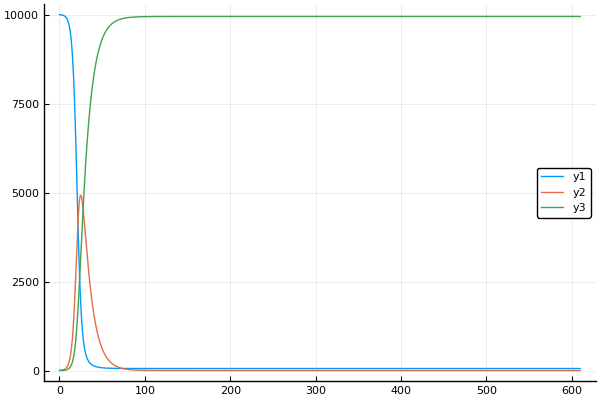

In [7]:
using Plots
pyplot()
plot(timevec, resultvals)

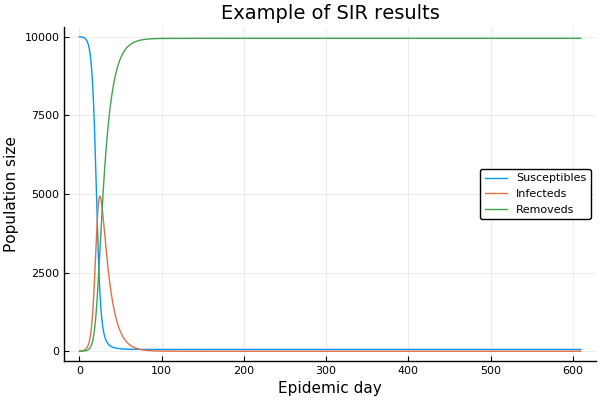

In [8]:
plot(timevec, resultvals, 
title  = "Example of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label  = ["Susceptibles" "Infecteds" "Removeds"]
)